In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Problem 1 

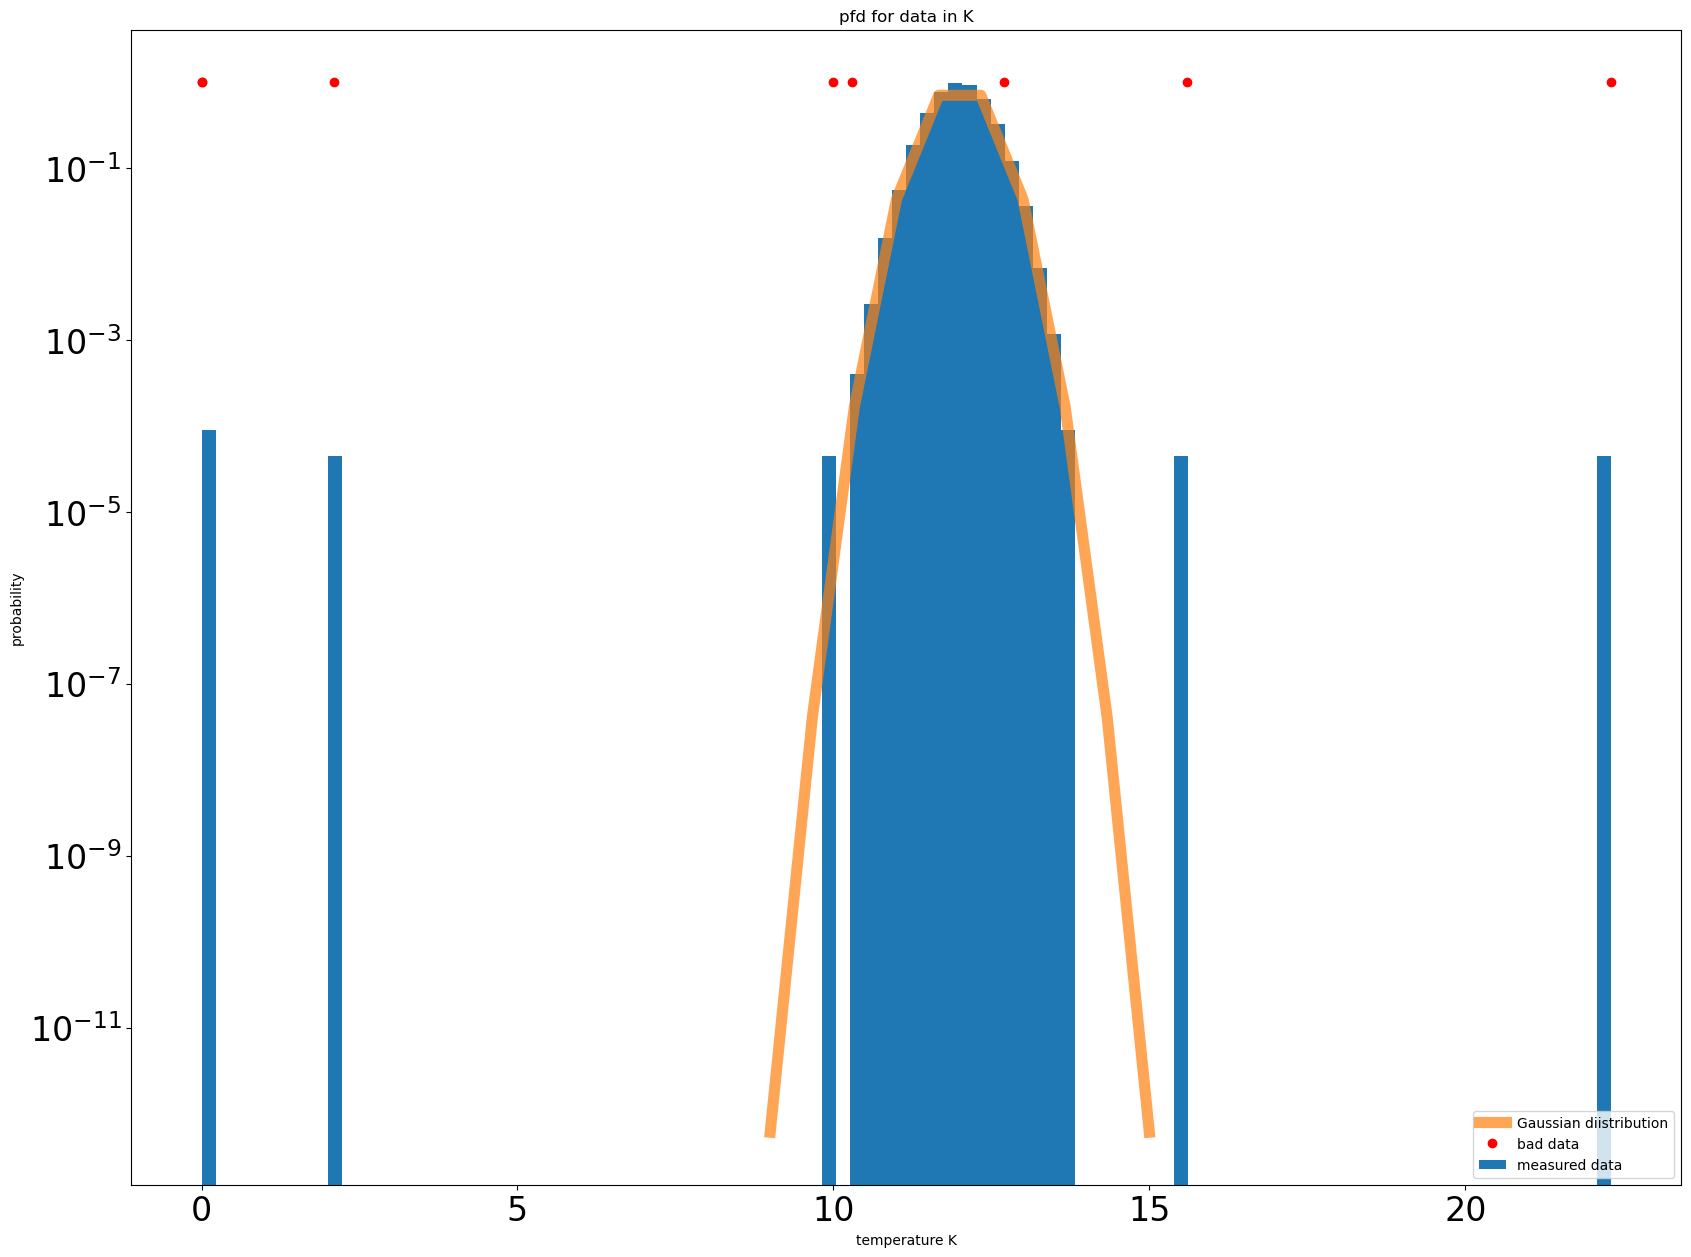

In [103]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')


x = np.linspace(9,15,10)

ax.plot(x,stats.norm.pdf(x, loc = 12., scale = 0.4),linewidth = 8,alpha = 0.7)
plt.title("pfd for data in K")
plt.xlabel("temperature K")
plt.ylabel("probability")


x = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
y = [1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.00001, 1.0000001, 1.0000001, 1.0000001]
ax.plot(x, y, 'o', color='red');
plt.legend(["Gaussian diistribution","bad data", "measured data"])


plt.show()

2. What's the probabiliity of getting bad data given good data are most consistent with 12 +/- 0.4 K/ I would like to compare the result of this observation with the acutaly tru data. 
3. $Xσmax = \int_X^\inf \frac{}{2} erfc\frac{x}{\sqrt2}$


In [108]:
probability_sigma5 = 2*(1-stats.norm.cdf(1))
print("P of likly to be bad data based on observation",probability_sigma5)

P of likly to be bad data based on observation 0.31731050786291415


4

|  | True T | Bad T |
| --- | --- | --- |
| Your Test Good | 6905 | 3 |
| Your Test Bad | 3170 | 5 |

B) The number of omissions where I threw out good data is extremely high, therefore the precision of just 0.4-degree threshold might waste a good portion of good data. A threshold of 4 to 5 sigma would preserve most of the good data 

C) If we have a very stick statistical threshold with perfect precision, then the bad data are most likely avoidable. However, it would also mean much of the good data might be wasted, thus it depends on the threshold of getting a great portion of good data relative to the bad data. 

# Problem 2 

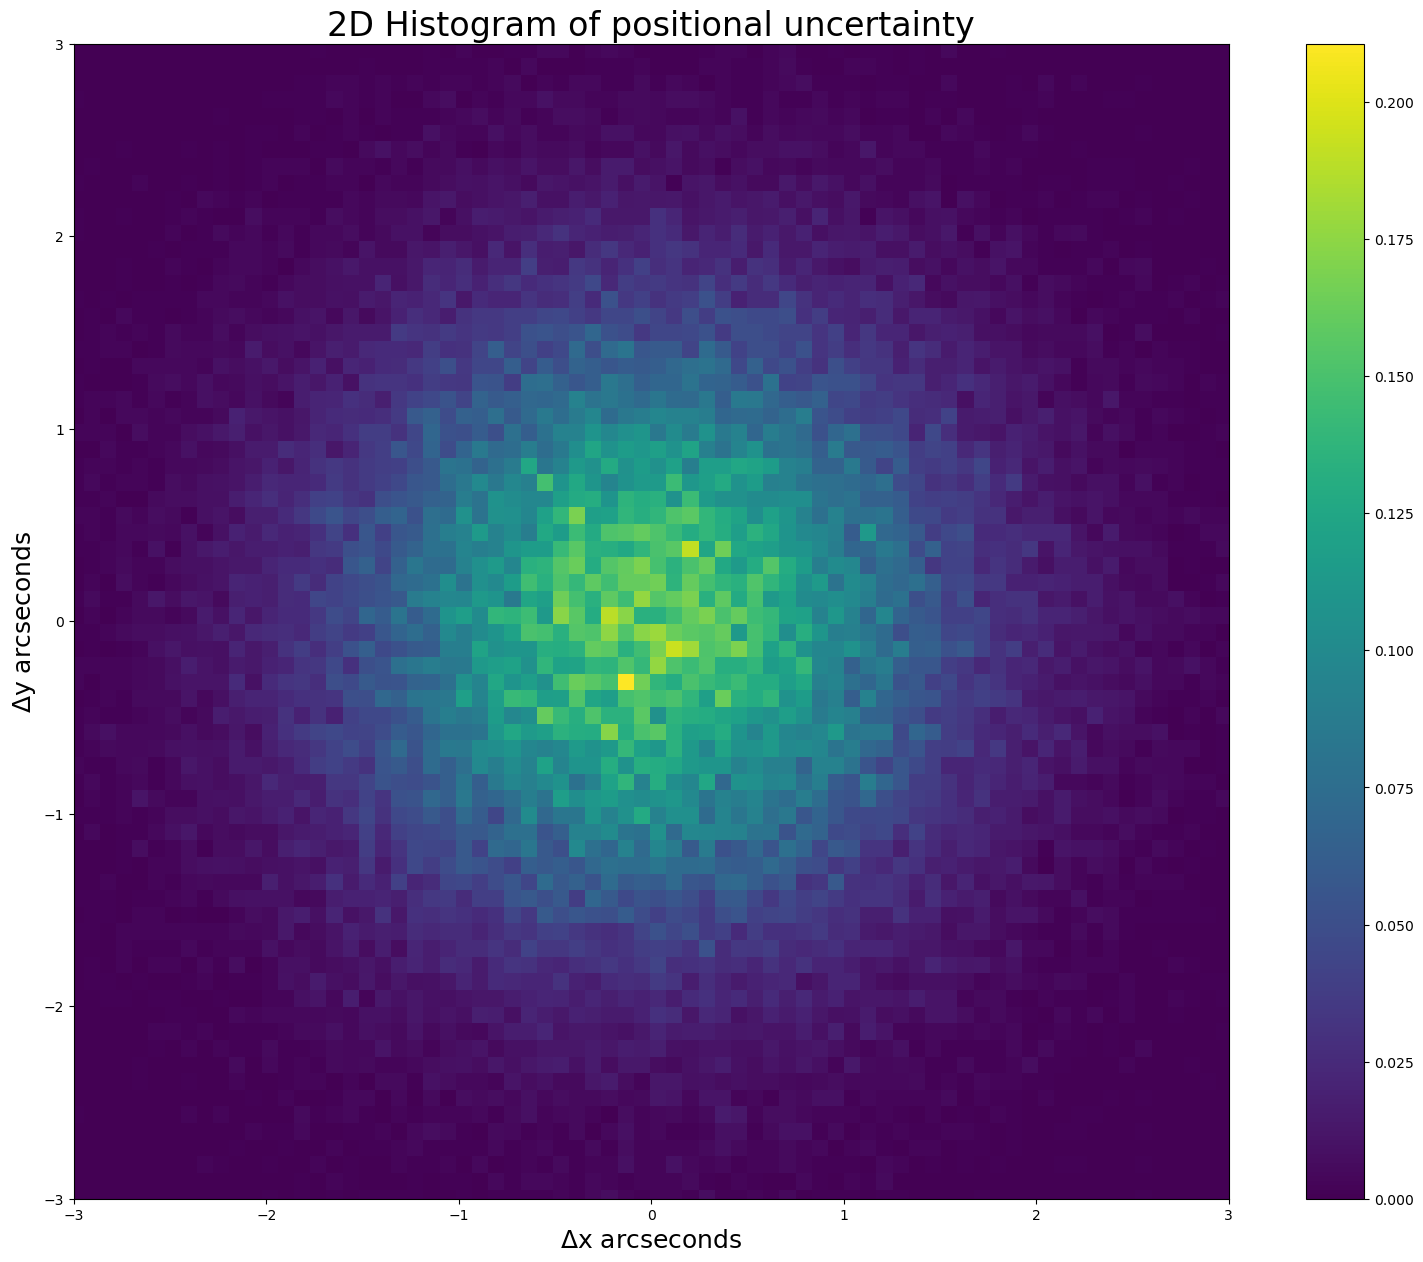

In [112]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

1. The question is asking for the range of the 2d plot above where the color appear to match with 5-sigma color. In other words, the 5 sigma movement whch has the distribution of $\sqrt(x^2+y^2)$

2. The euclidean norm of x1 and x2 gaussian is $\sqrt(x^2+y^2)$, which has Ryleigh distibution, what value away from the mean of Ryleigh distibution would give an integral to infinity that has 5 sigma in a normal gaussian distribution? 

In [132]:
five_sigma = 3*10**-7 
sigma = stats.rayleigh.ppf(1-five_sigma)
print(sigma)

5.480781579746905


3. the distance is approx. 5.48 arcsec for a 5 sigma detection motion

# Problem 3

1. What is the probability that we can observe a less or equal signal like of 6800 cosmic rays given there's one cosmic ray per minute and a the moon is observed 8 hours a day for 15 days?

2. 
mean of # of cosmic rays over 15 days is 1*60*8*15 = 7200 
and we know that cosmic ray has poisson distribution

We can then take the integral from 0 to 6800 over the pdf of poisson distribution with a mean of 7200
to get the probability 
for μ = 7200

p(k) =$\int_0^{6800} e^{-μ}\frac{μ^k}{k!}$

In [4]:
mu = 7200
d = stats.poisson(mu)
pr =d.cdf(6800)
sigma = stats.norm.ppf(1-pr)
print(sigma)

4.750747965778662


3. The probability of moon shadow detection is 4.75 sigma 